In [1]:
import turicreate

image_train = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Task 1: Compute summary statistics of the data

In [2]:
sketch = turicreate.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# Task 2: Create category-specific image retrieval models

In [3]:
cat_dataset = image_train[image_train['label'] == 'cat']
cat_dataset.head()

id,image,label,deep_features,image_array
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
159,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0,0.6432753205299377, 0.0, ...","[154.0, 145.0, 135.0,152.0, 144.0, 135.0, ..."
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.5109639167785645, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
367,Height: 32 Width: 32,cat,"[1.3865805864334106, 0.0,0.0, 0.0, 0.0, ...","[168.0, 151.0, 143.0,145.0, 130.0, 124.0, ..."
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."
494,Height: 32 Width: 32,cat,"[0.0, 0.0539512038230896,1.9574512243270874, 0.0, ...","[26.0, 34.0, 29.0, 24.0,29.0, 25.0, 33.0, 43.0, ..."
597,Height: 32 Width: 32,cat,"[0.0, 0.0,0.04706370830535889, ...","[133.0, 153.0, 138.0,126.0, 146.0, 136.0, ..."
788,Height: 32 Width: 32,cat,"[0.5058419108390808, 0.0,0.0, 0.0, ...","[184.0, 200.0, 197.0,189.0, 203.0, 200.0, ..."
882,Height: 32 Width: 32,cat,"[0.0, 0.0,0.15620028972625732, ...","[141.0, 133.0, 112.0,143.0, 133.0, 113.0, ..."


In [4]:
dog_dataset = image_train[image_train['label'] == 'dog']
auto_dataset = image_train[image_train['label'] == 'automobile']
bird_dataset = image_train[image_train['label'] == 'bird']

In [5]:
cat_knn_model = turicreate.nearest_neighbors.create(cat_dataset, features = ['deep_features'], label = 'id')
dog_knn_model = turicreate.nearest_neighbors.create(dog_dataset, features = ['deep_features'], label = 'id')
auto_knn_model = turicreate.nearest_neighbors.create(auto_dataset, features = ['deep_features'], label = 'id')
bird_knn_model = turicreate.nearest_neighbors.create(bird_dataset, features = ['deep_features'], label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

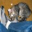

In [6]:
test_image = image_test[0:1]
test_image['image'].explore()

In [7]:
cat_knn_result = cat_knn_model.query(test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.627ms      |

| Done         |         | 100         | 18.125ms     |

+--------------+---------+-------------+--------------+

In [8]:
dog_knn_result = dog_knn_model.query(test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.028ms      |

| Done         |         | 100         | 16.889ms     |

+--------------+---------+-------------+--------------+

In [9]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

In [10]:
image_test_cat_model_neighbors = get_images_from_ids(cat_knn_model.query(image_test))

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 168000  | 8.25147     | 723.783ms    |

| Done         | 2036000 | 100         | 787.299ms    |

+--------------+---------+-------------+--------------+

In [11]:
image_test_cat_model_neighbors['id'].head()

dtype: int
Rows: 10
[33, 36, 159, 331, 367, 384, 494, 597, 788, 882]

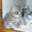

In [12]:
image_test_cat_model_neighbors[1]['image']

In [13]:
image_test_dog_model_neighbors = get_images_from_ids(dog_knn_model.query(image_test))

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 168000  | 8.25147     | 736.8ms      |

| Done         | 2036000 | 100         | 816.025ms    |

+--------------+---------+-------------+--------------+

In [14]:
image_test_dog_model_neighbors['id'].head()

dtype: int
Rows: 10
[70, 107, 177, 424, 462, 542, 573, 851, 919, 1172]

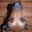

In [15]:
image_test_dog_model_neighbors[1]['image']

# Task 3: Try a simple example of nearest-neighbors classification

In [16]:
cat_knn_result

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [29]:
cat_mean, dog_mean = 0, 0 
for i in range(5):
    cat_mean += cat_knn_result[i]['distance']
    dog_mean += dog_knn_result[i]['distance']
    
cat_mean /= 5
dog_mean /= 5

print(cat_mean, dog_mean)

36.15573070978294 37.77071136184157


# Task 4: Compute nearest neighbors accuracy

In [18]:
cat_dataset_test = image_test[image_test['label'] == 'cat']
dog_dataset_test = image_test[image_test['label'] == 'dog']
auto_dataset_test = image_test[image_test['label'] == 'auto']
bird_dataset_test = image_test[image_test['label'] == 'bird']

In [19]:
cat_results = cat_knn_model.query(dog_dataset_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 355.863ms    |

| Done         | 509000  | 100         | 379.281ms    |

+--------------+---------+-------------+--------------+

In [20]:
dog_results = dog_knn_model.query(dog_dataset_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 273.658ms    |

| Done         | 509000  | 100         | 296.561ms    |

+--------------+---------+-------------+--------------+

In [21]:
auto_results = auto_knn_model.query(dog_dataset_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 143.51ms     |

| Done         | 509000  | 100         | 170.092ms    |

+--------------+---------+-------------+--------------+

In [22]:
bird_results = bird_knn_model.query(dog_dataset_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 39000   | 8.159       | 132.768ms    |

| Done         | 478000  | 100         | 167.542ms    |

+--------------+---------+-------------+--------------+

In [23]:
cat_results

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [24]:
results = {'dog-cat': cat_results['distance'], 'dog-dog': dog_results['distance'], 
           'dog-auto': auto_results['distance'], 'dog-bird': bird_results['distance']}

In [25]:
results = turicreate.SFrame(data=results)
results.head()

dog-auto,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [26]:
def is_dog_correct(row):
    if row['dog-dog'] < row['dog-auto'] and row['dog-dog'] < row['dog-bird'] and row['dog-dog'] < row['dog-cat']:
        return 1
    else:
        return 0

In [27]:
results['is_dog_correct'] = results.apply(is_dog_correct)
results.head()

dog-auto,dog-bird,dog-cat,dog-dog,is_dog_correct
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335,1
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554,1
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584,1
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193,1
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636,0
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124,1
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545,1
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034,1
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838,1
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455,0


In [28]:
dog_correct_predictions = results['is_dog_correct'].sum()
dog_correct_predictions/len(results)

0.678